## 0. Import everything needed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import log10

The classes needed are `Neal_3` and `PPMx` located in main_code.MCMCs.

`plot_clusters` is used for visualizations.

In [2]:
import sys, os
sys.path.insert(0, os.path.dirname(os.path.abspath('../../main_code')))
from main_code.MCMCs import Neal_3, PPMx
from main_code.visualization import plot_clusters

## 1. Read data

In [3]:
# Load the dataset
dataset = pd.read_hdf("../../data/dataset.h5", key='dataset', start=0, stop=500)

# Here are the variables.
# Variable 1 : dataset['EclipticLatitude']
# Variable 2 : dataset['EclipticLongitude']
# Covariate 1 : dataset['Cov1']
# Covariate 2 : dataset['Cov2']

# (Hint): if you inspect the distribution of each variable and covariate, some of them may be more interesting to look at in log10

In [4]:
dataset.head()

,Cov1,Cov2,EclipticLatitude,EclipticLongitude
0,0.000109,1.506329e-22,0.308148,-1.374244
1,0.000095,9.750626e-23,0.116915,-1.494451
2,0.000136,3.561262e-22,-0.414557,-1.845617
3,0.000096,1.189690e-22,-0.113360,-1.653893
4,0.000130,3.460225e-22,0.230220,1.599283


In [5]:
# plt.hist(dataset['EclipticLatitude'])

In [6]:
# plt.hist(dataset['EclipticLongitude'])

In [7]:
# plt.hist(dataset['Cov1'])

In [8]:
# plt.hist(dataset['Cov2'])

In [9]:
# plt.hist(dataset['Cov2'].apply(log10))

dataset['Cov2'] = dataset['Cov2'].apply(log10)

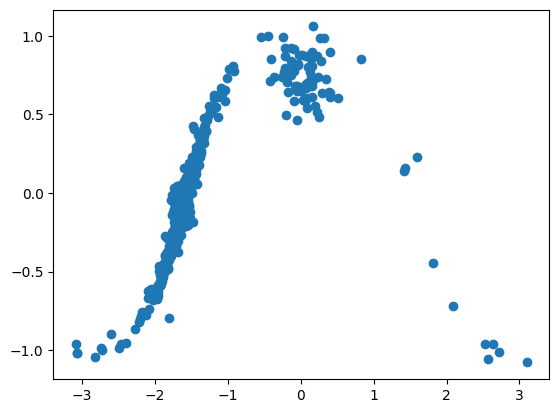

In [10]:
plt.scatter(dataset['EclipticLongitude'], dataset['EclipticLatitude'])

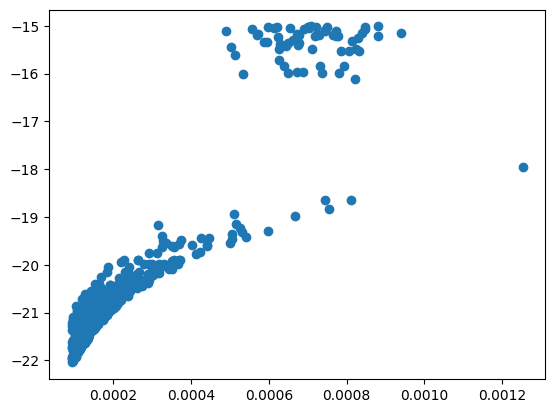

In [11]:
plt.scatter(dataset['Cov1'], dataset['Cov2'])

In [12]:
Y = dataset[['EclipticLongitude', 'EclipticLatitude']].to_numpy()

X = dataset[['Cov1', 'Cov2']].to_numpy()

## 2. Fit the data

### 2.1 Create the object

In [13]:
alpha = 0.1

ppmx = PPMx(alpha = alpha)

iter = 100
burn_in = 20
iterations = list(range(iter + 1))

### 2.2 Fit the data

In [14]:
lambda_pen = 1

history = ppmx.fit(Y, X, 100, metrics=["entropy"], lambda_penalty=lambda_pen)

MCMC Progress: 100%|██████████| 100/100 [07:59<00:00,  4.79s/step]


### 2.3 Visualize the results

In [15]:
ppmx.compute_similarity_matrix(burn_in)

Similarity Matrix Progress: 100%|██████████| 81/81 [00:04<00:00, 18.49step/s]


array([[1.        , 0.73267327, 0.73267327, ..., 0.75247525, 0.73267327,
        0.72277228],
       [0.73267327, 1.        , 0.7029703 , ..., 0.73267327, 0.71287129,
        0.72277228],
       [0.73267327, 0.7029703 , 1.        , ..., 0.72277228, 0.7029703 ,
        0.69306931],
       ...,
       [0.75247525, 0.73267327, 0.72277228, ..., 1.        , 0.73267327,
        0.72277228],
       [0.73267327, 0.71287129, 0.7029703 , ..., 0.73267327, 1.        ,
        0.7029703 ],
       [0.72277228, 0.72277228, 0.69306931, ..., 0.72277228, 0.7029703 ,
        1.        ]])

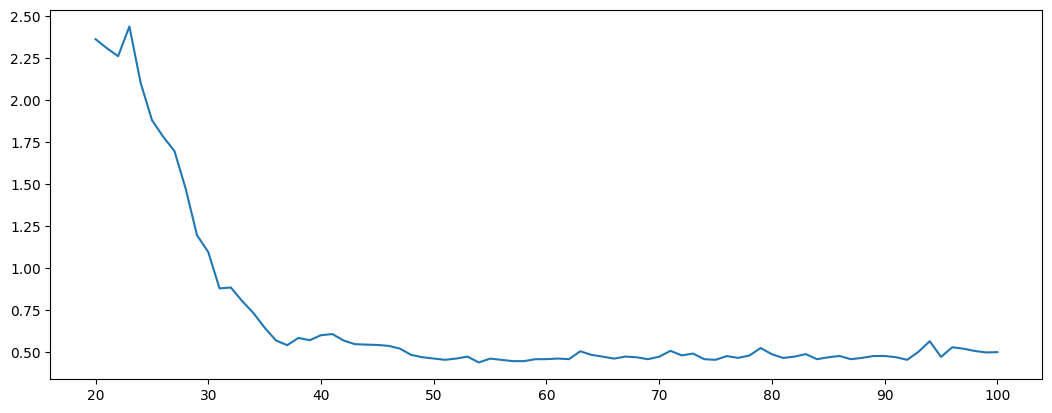

In [16]:
plt.figure(figsize=(12.8, 4.8))
plt.plot(iterations[burn_in:], ppmx.metrics["entropy"][burn_in:])
plt.show()

Point Estimate Progress: 100%|██████████| 101/101 [00:27<00:00,  3.69step/s]


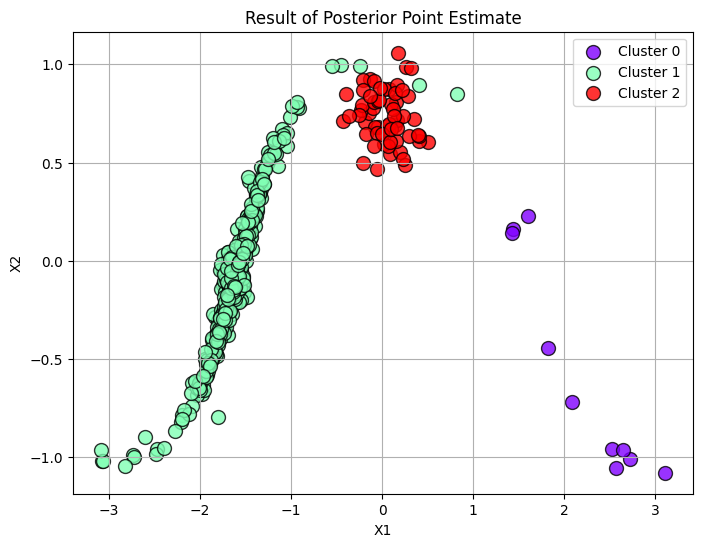

In [17]:
_, _ = ppmx.find_optimal_clustering()
plot_clusters(Y, ppmx.optimal_clustering, "Result of Posterior Point Estimate")

### 2.4 Save results

In [18]:
file_path = "../../results/test_with_real_data.mcmc"
ppmx.save(file_path)

del ppmx